In [1]:
import numpy as np
import matplotlib.pyplot as plt

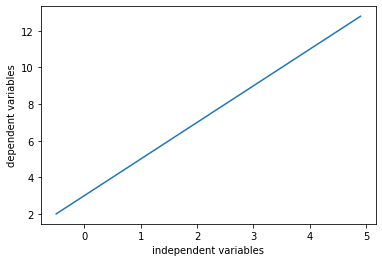

In [2]:
# linear 
x= np.arange(-0.5 , 5.0 , 0.1)
y = 2*(x) + 3
plt.plot(x, y)
plt.xlabel('independent variables')
plt.ylabel('dependent variables')
plt.show()

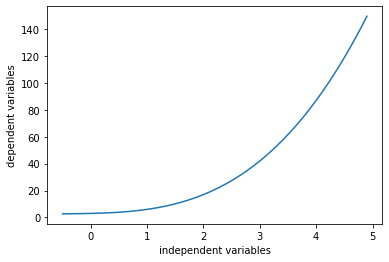

In [3]:
# non linear
x= np.arange(-0.5 , 5.0 , 0.1)
y = (x**3) + (x**2) + (x) + 3
plt.plot(x, y)
plt.xlabel('independent variables')
plt.ylabel('dependent variables')
plt.show()

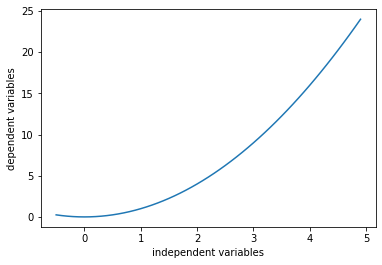

In [4]:
# quadratic
x= np.arange(-0.5 , 5.0 , 0.1)
y = np.power(x,2)
plt.plot(x, y)
plt.xlabel('independent variables')
plt.ylabel('dependent variables')
plt.show()

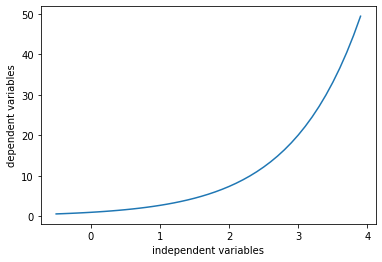

In [7]:
# Exponential 
x= np.arange(-0.5 , 4.0 , 0.1)
y = np.exp(x)
plt.plot(x, y)
plt.xlabel('independent variables')
plt.ylabel('dependent variables')
plt.show()

<ipython-input-8-ba40b5895fa0>:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


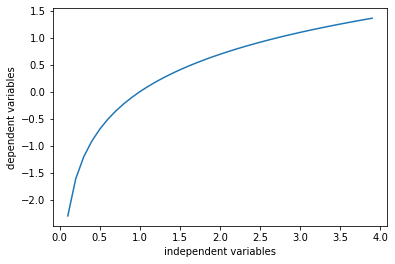

In [8]:
# logarithmic
x= np.arange(-0.5 , 4.0 , 0.1)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('independent variables')
plt.ylabel('dependent variables')
plt.show()

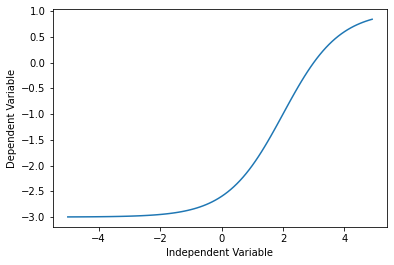

In [9]:
# sigmoidal or logistic
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [10]:
import pandas as pd
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


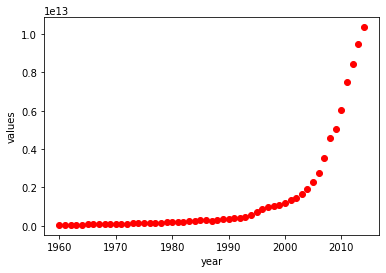

In [12]:
# plotting the dataset
x_data = df['Year'].values
y_data = df['Value'].values
plt.scatter(x_data , y_data , color = 'red')
plt.xlabel('year')
plt.ylabel('values')
plt.show()

In [13]:
# choosing a model
#From an initial look at the plot, we determine that the logistic function 
#could be a good approximation, since it has the property of starting with
#a slow growth, increasing growth in the middle, and then decreasing again 
#at the end; 

In [14]:
# building the model
def sigmoid(x, beta_1 , beta_2):
    y = 1/(1+ np.exp(-beta_1 * (x - beta_2)))
    return y

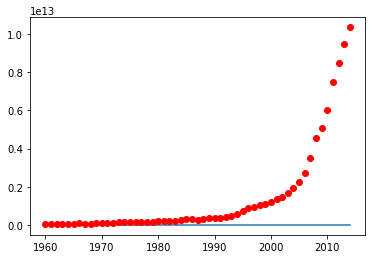

In [16]:
beta_1 = 0.10
beta_2 = 1990.0
# logistic function 
y_pred = sigmoid(x_data , beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(x_data, y_pred)
plt.plot(x_data, y_data, 'ro')

In [17]:
# lets normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [18]:
# finding the best parameters for fitting the line
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


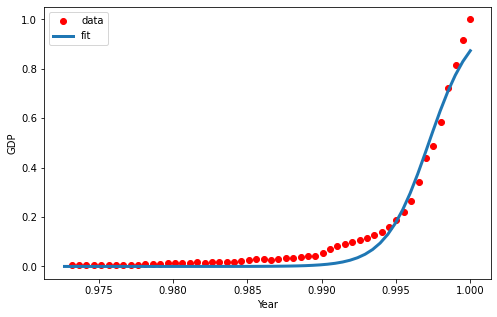

In [19]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [20]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )


Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.90
